# Problem Set 2 Advanced Macro

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
beta = 0.96
alpha = 0.25
A = (alpha*beta)**(-1)

# Need to make a linear space s.t the values of steady state go from 0.8 to 1.2 in increases of one-hundreth

space = np.linspace(0.8,1.2,40)
V_0 = np.zeros(40)

In [23]:

def utility_compute(Intial_Value,n):
    optimal_utility = []
    for i in range(n):
        possible_values = []
        for j in range(n):
            Utility = np.log(A*np.power(space[i],alpha)-space[j]) + beta*(Intial_Value[j])
            possible_values.append(Utility)
        maximum = np.max(possible_values)
        optimal_utility.append(maximum)
    return np.array(optimal_utility)

print(utility_compute(V_0,40))
#Above computes one iteration using loops, then we can iterate the above function to do do further iterations!!
#Not very efficient rn, require 3 loops for a full compute :(
        

[1.14441069 1.14840508 1.15234606 1.15623501 1.16007325 1.16386207
 1.1676027  1.17129633 1.17494409 1.17854709 1.18210639 1.18562303
 1.18909798 1.19253221 1.19592664 1.19928217 1.20259966 1.20587994
 1.20912383 1.21233211 1.21550554 1.21864484 1.22175074 1.22482392
 1.22786506 1.23087479 1.23385376 1.23680256 1.23972181 1.24261206
 1.24547387 1.24830781 1.25111438 1.2538941  1.25664748 1.259375
 1.26207713 1.26475433 1.26740705 1.27003572]


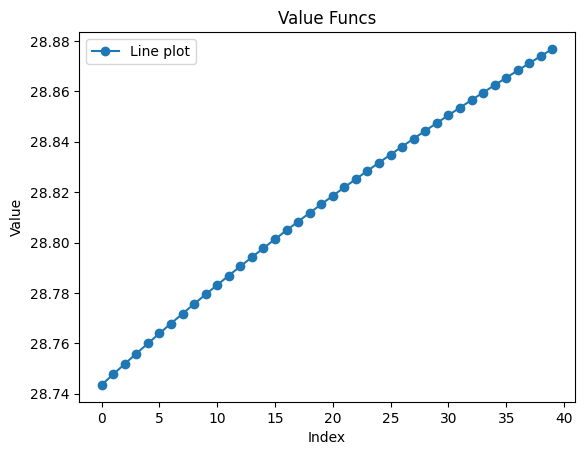

In [24]:

def value_func_iterations(error,n):
    iteration = 0
    while error > 1e-5:
        if iteration == 0:
            V_1 = utility_compute(V_0,n)
            error = np.linalg.norm(V_1-V_0)
            iteration+=1
        else:
            V_copy = V_1.copy()
            V_1 = utility_compute(V_copy,n)
            diff = V_1 - V_copy
            iteration+=1
            error = np.linalg.norm(V_1-V_copy)
    return V_1,iteration

V_STAR = value_func_iterations(1,40)[0]

plt.plot(V_STAR, marker='o', label="Line plot")
plt.title("Value Funcs")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

#Define the base case after which we just iterate the one-step function made in the code block before this one.



Seem to have a fairly linear increase in the value functions based on initial conditions given. 

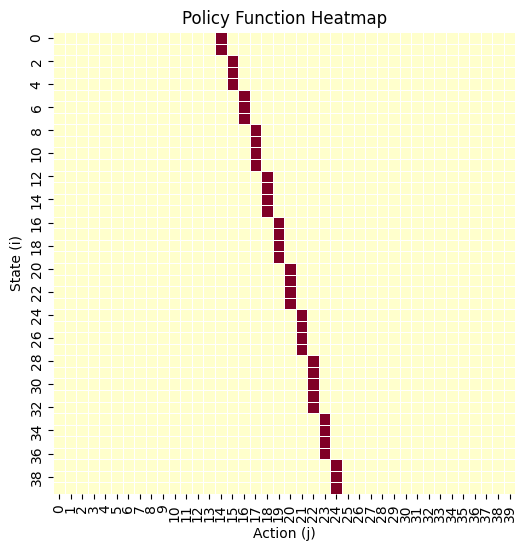

In [15]:
# should combine this with the previous one step computation, but lets just copy and paste it here with a few changes
def policy_function(OPTV,n):
    policy_func = np.zeros((n,n))
    for i in range(n):
        possible_values = []
        for j in range(n):
            Utility = np.log(A*np.power(space[i],alpha)-space[j]) + beta*(OPTV[j])
            possible_values.append(Utility)
        maximum = np.argmax(possible_values)

        policy_func[i][maximum] = 1
    return policy_func

P = policy_function(V_STAR,40)

plt.figure(figsize=(8, 6))
sns.heatmap(P, annot=False, cmap="YlOrRd", cbar=False, linewidths=0.5, square=True)
plt.title("Policy Function Heatmap")
plt.xlabel("Action (j)")
plt.ylabel("State (i)")
plt.show()

    

Seems like in the above the higher states slowly converge to the steady state result. Due to the diagonal result seen above.

In [25]:
#Just have to plot the policy function results out
Approx = np.dot(P,space)
Exact = alpha*beta*A*np.power(space,alpha)

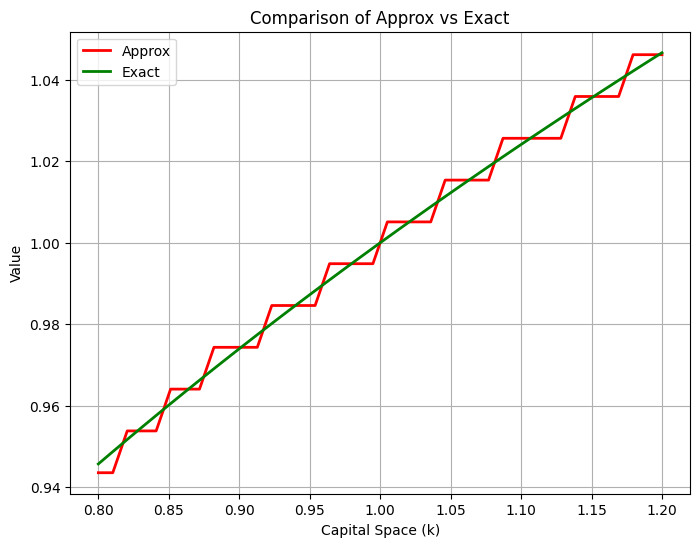

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(space, Approx, color='red', label='Approx', linewidth=2)
plt.plot(space, Exact, color='green', label='Exact', linewidth=2)
plt.title("Comparison of Approx vs Exact")
plt.xlabel("Capital Space (k)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

Approximation does quite well considering that in the linearisation we include only 40 points.

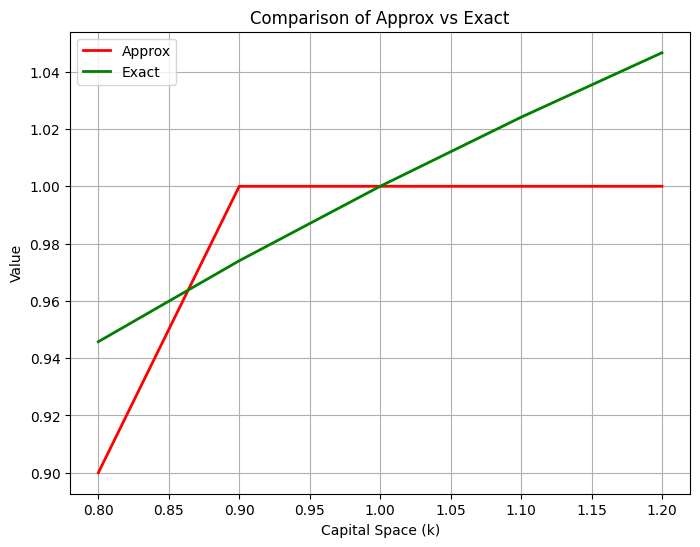

In [29]:
space = np.linspace(0.8,1.2,5)
V_0 = np.zeros(5)
V_STAR = value_func_iterations(1,5)[0]
P = policy_function(V_STAR,5)
Exact = alpha*beta*A*np.power(space,alpha)
Approx = np.dot(P,space)

plt.figure(figsize=(8, 6))
plt.plot(space, Approx, color='red', label='Approx', linewidth=2)
plt.plot(space, Exact, color='green', label='Exact', linewidth=2)
plt.title("Comparison of Approx vs Exact")
plt.xlabel("Capital Space (k)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

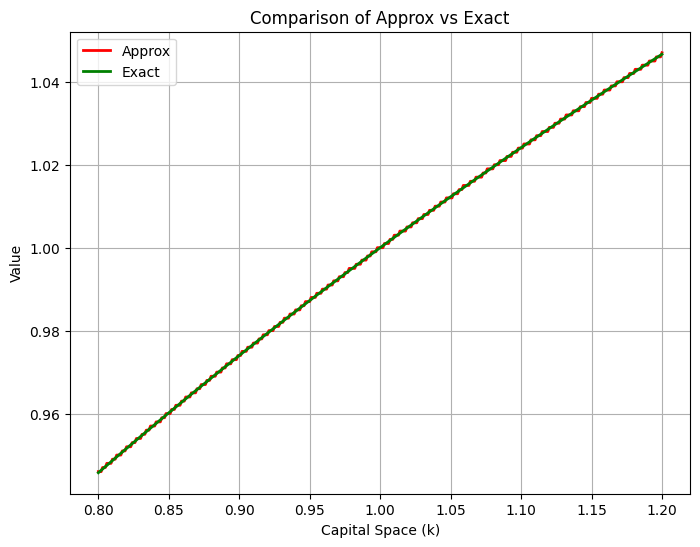

In [30]:
space = np.linspace(0.8,1.2,401)
V_0 = np.zeros(401)
V_STAR = value_func_iterations(1,401)[0]
P = policy_function(V_STAR,401)
Exact = alpha*beta*A*np.power(space,alpha)
Approx = np.dot(P,space)

plt.figure(figsize=(8, 6))
plt.plot(space, Approx, color='red', label='Approx', linewidth=2)
plt.plot(space, Exact, color='green', label='Exact', linewidth=2)
plt.title("Comparison of Approx vs Exact")
plt.xlabel("Capital Space (k)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

Making the approximation 'tighter' improves how close we are to the actual solution.